In [1]:
#imports
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create dataframe from csv data
df = pd.read_csv('project_modified.csv')

# load the world map shapefile using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_map = world.merge(df, how='left', left_on='iso_a3', right_on='Country Code')

/var/folders/60/qs5806lj1d92s7jlprh5nvhr0000gn/T/ipykernel_73662/1622895468.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [3]:
# consolidate dataframe
columns = ['continent', 'Country Name', 'Country Code', 'Year',
    'Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)',
    'Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)',
    'Educational attainment, at least completed upper secondary, population 25+, female (%) (cumulative)', 
    'Educational attainment, at least completed upper secondary, population 25+, male (%) (cumulative)',
    "Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)", 
    "Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)",
    "Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)", 
    "Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative)",
    'Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)',
    'Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)',
    'Labor force, female (% of total labor force)',
    'Government expenditure on education, total (% of GDP)']

column_rename = {'continent':'Continent',
                 'Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)':'Primary (F)',
                 'Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)':'Primary (M)',
                 'Educational attainment, at least completed upper secondary, population 25+, female (%) (cumulative)':'Secondary (F)',
                 'Educational attainment, at least completed upper secondary, population 25+, male (%) (cumulative)':'Secondary (M)',
                 "Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)":'Bachelors (F)',
                 "Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)":'Bachelors (M)',
                 "Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)":'Masters (F)',
                 "Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative)":'Masters (M)',
                 'Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)':'PhD (F)',
                 'Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)':'PhD (M)'}
df_clean = df_map[columns].rename(columns=column_rename)

# separate by continent
oceania = df_clean.where(df_clean['Continent'] == 'Oceania').dropna(subset=['Continent'])
africa = df_clean.where(df_clean['Continent'] == 'Africa').dropna(subset=['Continent'])
asia = df_clean.where(df_clean['Continent'] == 'Asia').dropna(subset=['Continent'])
s_america = df_clean.where(df_clean['Continent'] == 'South America').dropna(subset=['Continent'])
n_america = df_clean.where(df_clean['Continent'] == 'North America').dropna(subset=['Continent'])
europe = df_clean.where(df_clean['Continent'] == 'Europe').dropna(subset=['Continent'])

dfs = [africa, asia, europe, n_america, oceania, s_america]

In [4]:
def hist_continent(dfs, suptitle, column):
    #subplot_titles = ['Primary', 'Secondary', "Bachelors", 'Masters', 'PhD']
    colors = ['#5d85b0', '#f6922e', '#e66766', '#80beb9', '#64ab5c', '#efcf4f']
    subplot_titles = ['Africa', 'Asia', "Europe", 'North America', 'Oceania', 'South America']
    fig, axes = plt.subplots(1, len(subplot_titles), figsize=(25, 5), sharex=False, sharey=True)
    #meow should they share an x axis?

    # iterate over subplot titles
    for i, title in enumerate(subplot_titles):
        ax = axes[i]


        # extract the column names for female and male for the current education level

        # create histogram for the female data
        sns.histplot(data=dfs[i][column], kde=True, color=colors[i], alpha=0.7, ax=ax)

        # label x axis
        ax.set_xlabel(subplot_titles[i], fontsize=20)
        ax.tick_params(axis='x', labelsize=14)
        ax.set_ylabel('Frequency', fontsize=20)

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(suptitle, fontsize=28, y=1.05)

    # Show plot
    plt.show()

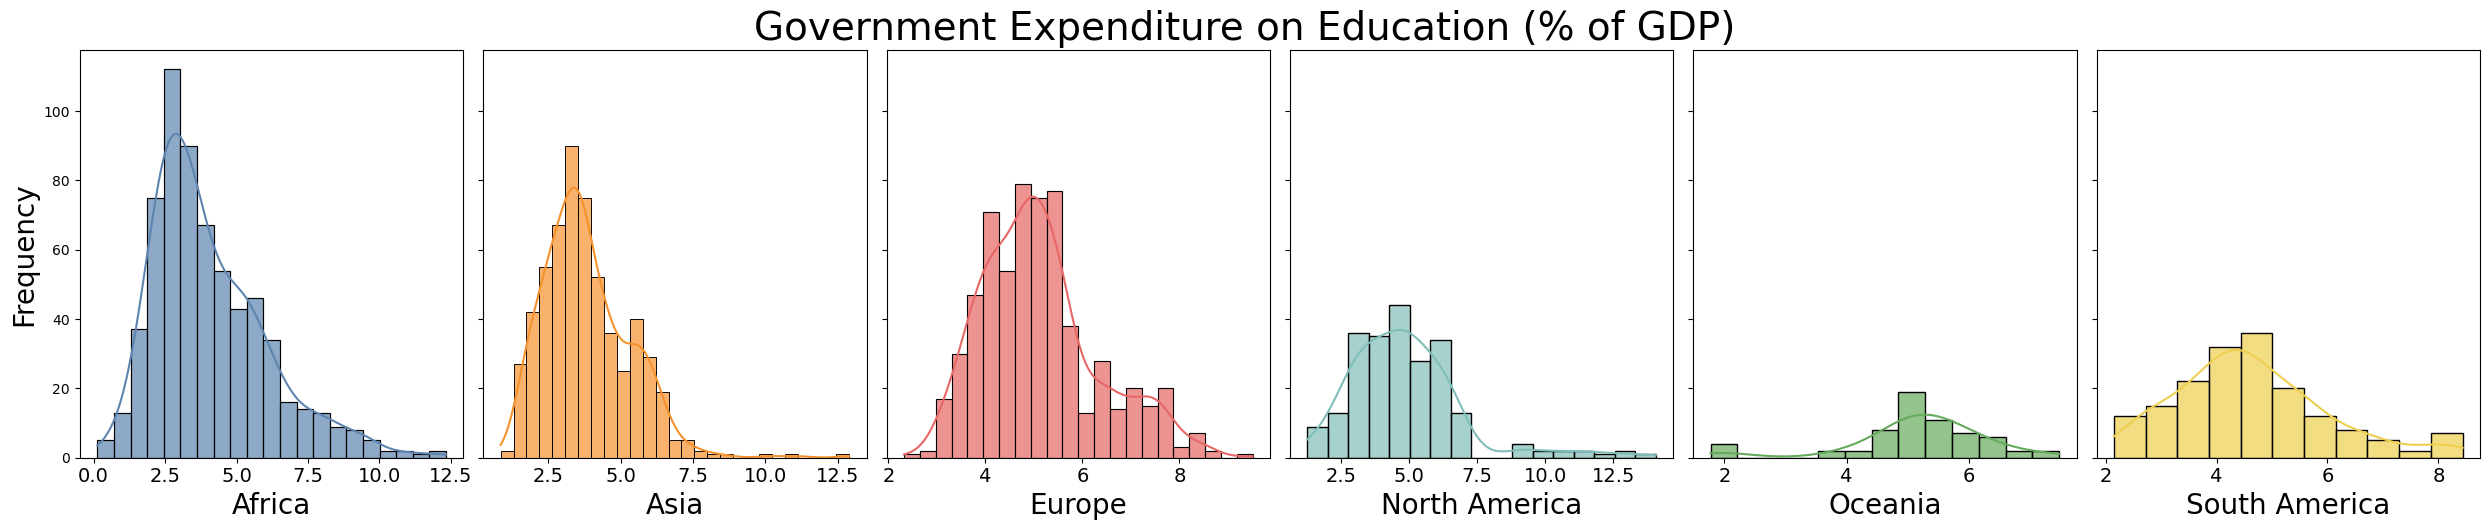

In [5]:
hist_continent(dfs, 'Government Expenditure on Education (% of GDP)', 'Government expenditure on education, total (% of GDP)')

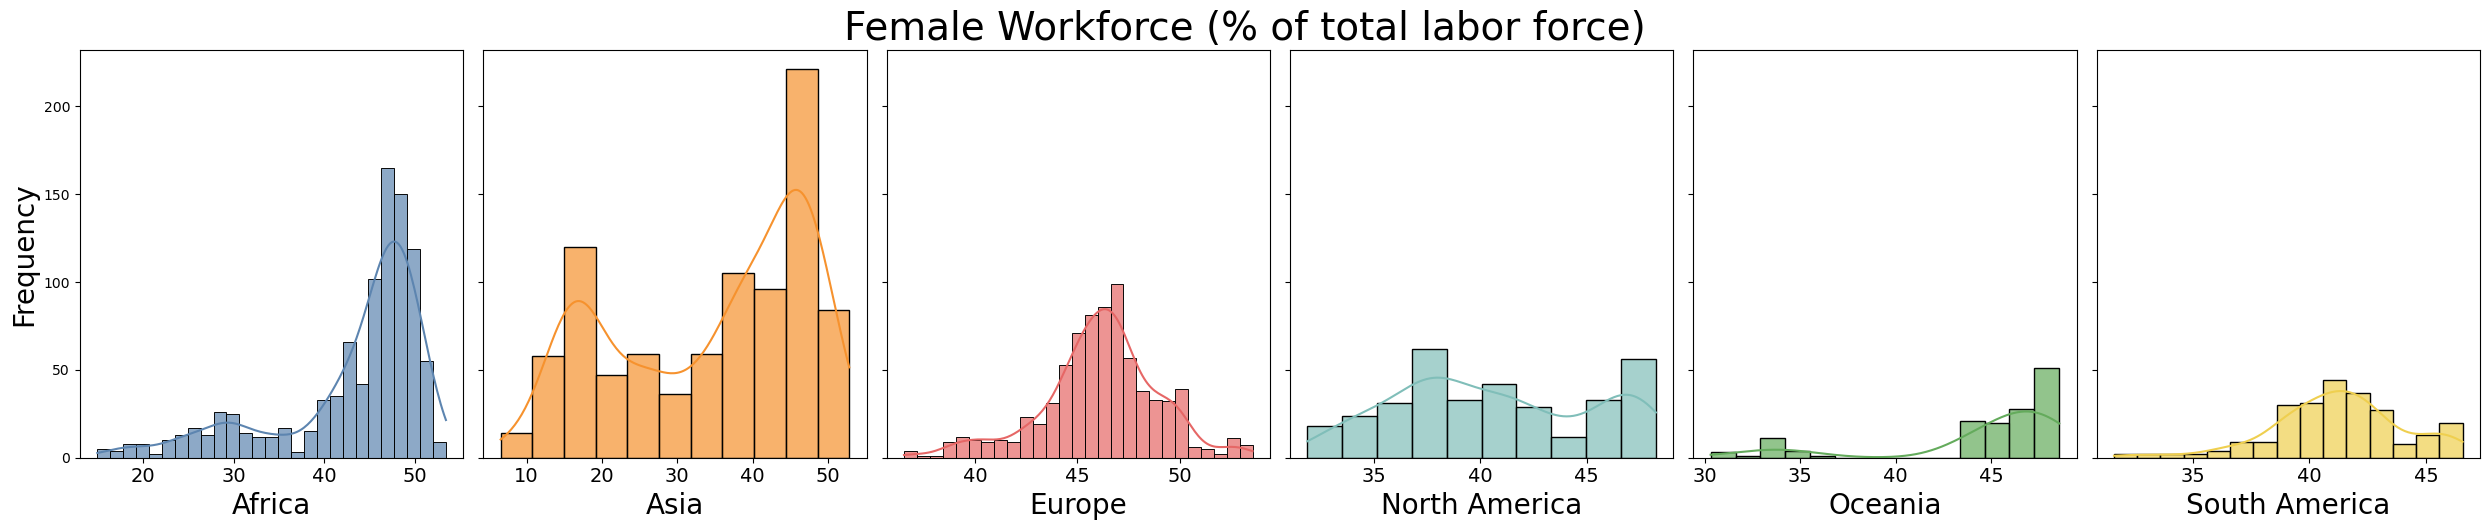

In [6]:
hist_continent(dfs, 'Female Workforce (% of total labor force)', 'Labor force, female (% of total labor force)')